In [15]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# option = {  "option_spec": [,]
#             "position": , 
#             "nominal":,
#             "strike":,
#             "expiry":
# }

def startegy(options, S):
    profit = 0
    for element in options:
        if element["option_spec"][0] == "vanilla": 
            if element["option_spec"][1] == "call":
                profit += element["position"] * element["nominal"]*max(0,S - element["strike"])
            elif element["option_spec"][1] == "put":
                profit += element["position"] * element["nominal"]*max(0, element["strike"] - S)
        elif element["option_spec"][0] == "con":   
            if element["option_spec"][1] == "call":
                profit += element["position"] * element["nominal"] * ((S - element["strike"]) > 0)
            elif element["option_spec"][1] == "put":
                profit += element["position"] * element["nominal"] * ((S - element["strike"]) > 0)
        elif element["option_spec"][0] == "aon":
            if element["option_spec"][1] == "call":
                profit += S * element["position"] * element["nominal"] * ((S - element["strike"]) > 0)
            elif element["option_spec"][1] == "put":
                profit += S * element["position"] * element["nominal"] * ((S - element["strike"]) > 0)
    return profit

def unique_strikes(options):
    strikes = [e["strike"] for e in options]
    return np.unique(strikes)

def plot_strategy_value(S_range, options):
    values = [startegy(options, S) for S in S_range]
    strikes = unique_strikes(options)
    plt.figure(figsize=(8, 5))
    for strike in strikes:
        plt.axvline(x=strike, color='g', linestyle='--', label="Strike Price", alpha = 0.3)
    plt.plot(S_range, values, linestyle='-', linewidth=2, color='r', label="Strategy Value")
    plt.xlabel("S", fontsize=12, fontweight='bold')
    plt.ylabel("Wypłata ze strategii", fontsize=12, fontweight='bold')
    plt.title("Wypłata ze strategii", fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def 



In [22]:
option_1 = {"option_spec": ["vanilla", "call"], "position": 1, "nominal": 1, "strike": 100, "expiry": 1}
option_2 = {"option_spec": ["vanilla", "put"], "position": 1, "nominal": 1, "strike": 100, "expiry": 1}
option_3 = {"option_spec": ["con", "call"], "position": 1, "nominal": 1, "strike": 100, "expiry": 1}
option_4 = {"option_spec": ["con", "call"], "position": 100, "nominal": 1, "strike": 150, "expiry": 1}
option_5 = {"option_spec": ["aon", "call"], "position": 1, "nominal": 1, "strike": 100, "expiry": 1}
option_6 = {"option_spec": ["aon", "put"], "position": 1, "nominal": 1, "strike": 100, "expiry": 1}
option_strategy = [option_4, option_1]  

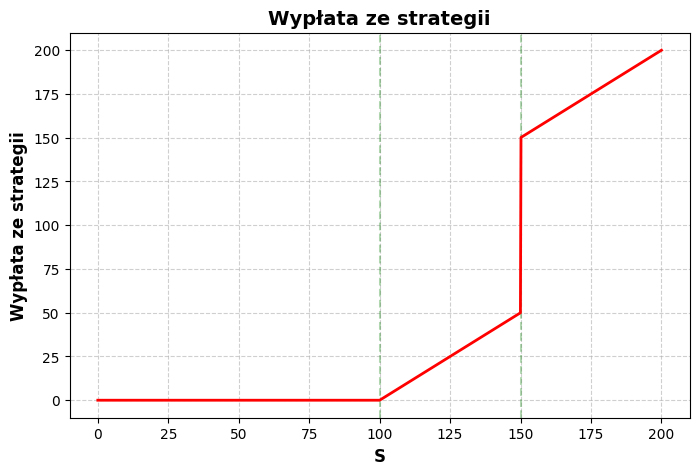

In [23]:
plot_strategy_value(np.linspace(0, 200, 1000 ), option_strategy)